# Adverse Selection

**Definition** Information Asymmetry
* A situation where agents in a market have an unequal amount of information about the transaction (e.g. quality)

**Definition** Adverse Selection
* A situation where an agent in a market enters into a contract with another agent but, because of information asymmetry, one agent receives a poorer outcome
    - Example: Market for used cars. John is wanting to buy a used car from a local lot. Unfortunately, John must rely on the information that the salesperson Janet gives him about the vehicle. Consequently, he may end up with a lower-quality car (a "lemon") than he expects because she has the incentive to withold truthful information about a defective vehicle.
    - Example: Insurance Plus is a provider of health insurance. Kathy wants to get health insurance at a low price, so she may withhold information about the frequent backaches she gets associated with her job. Insurance Plus now ends up providing insurance converage to a risky individual due to this asymmetric information. 
    
    
## Akerlof's Model
This provides a model of information asymmetry over the model for used cars. 

### Utility Functions: 
Define the following variables:
* $X_j$ is the quality of the $j^{th}$ car owned buy a buyer or seller. 
* $M$ is the utility from other goods $M$ (price is 1 dollar). 
1. Seller: $$U_S = \sum_{j=1}^{n}X_j + M$$
2. Buyer: $$U_B = \sum_{j=1}^{n}1.2X_j + M$$

Here, the buyer values quality 20% more the seller. 
$$dU_S/dX_j = 1 \qquad dU_B/dX_j=1.2$$

### Car Quality:
Define car quality to be the probability of no breakdown within a week. So $X_j$  can be 0 (definitely breaks down) up to 100 (definitely will not break down). Moreover, assume that the distribution of car quality is uniform (i.e. there is an equal chance of any outcome):
$$X \sim Uniform(0,100)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lb = 0.0
ub = 100.0 
X = np.random.uniform(low=lb, high=ub, size=1000)
count, bins, ignored = plt.hist(X, 10, density=True,rwidth=0.75)
plt.plot(bins, (1/(ub-lb))*np.ones_like(bins), linewidth=2, color='r')
plt.xlabel("X")
plt.ylabel("Proportion")
plt.title("Sample from Uniform("+str(lb)+","+str(ub)+")")
plt.xticks(np.arange(0, 110, step=10.0))
plt.show()


<Figure size 640x480 with 1 Axes>

### Picking the Cars to Sell:

Utility without selling any cars:
$$U_S = \sum_{j=1}^{n}X_j + M$$

Utility after selling car 1 for a price $P$

$$U_S = \sum_{j=1}^{n}X_j - X_1 + M + P$$

Change in utility: $P-X_1$

* Sell if $P\geq X_1$
* Set of cars want to sell $\{X_i: X_i\leq P\}$

Let $X'$ be the quality of car that has exactly price $P$. 

Let this be 70. 

Thus the cars they **want** to sell are shown in red: 

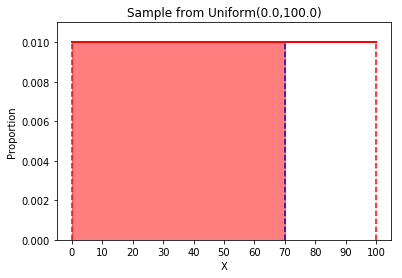

In [2]:
xprime = 70
p=(1/(ub-lb))
x = [0, xprime, xprime, 0]
y = [0, 0, p, p]
fig, ax = plt.subplots()
plt.plot((0,0),(0,p),'r--' )
plt.plot((100,100),(0,(1/(ub-lb))),'r--' )
plt.plot((xprime,xprime),(0,(1/(ub-lb))),'b--' )
plt.plot(bins, p*np.ones_like(bins), linewidth=2, color='r')
ax.fill(x, y,color='r', alpha=0.5)
plt.xlabel("X")
plt.ylabel("Proportion")
plt.title("Sample from Uniform("+str(lb)+","+str(ub)+")")
plt.xticks(np.arange(0, 110, step=10.0))
plt.axis([-5,105,0,0.011])
plt.show()


### Picking the Cars to Buy:
Buyers do not have full information about the quality of the car. Therefore, the best they can do is to form expectations, or averages, over the quality of the car. 

Expected utility without buying any more cars:
$$E[U_B] = E\left[ \sum_{j=1}^{n}1.2 X_j + M \right]$$

Expected utility after buying one more car for a price $P$

$$E[U_S] = E\left[\sum_{j=1}^{n}1.2 X_j + 2 X_{N+1} + M - P \right]$$

Expected change in utility: $1.2E[X_{n+1}]-P$

* Buy if $1.2E[X_{n+1}]\geq P$

Since $X$ is distributed normally, the expected value of quality is 
$$ E[X_i]=\frac{a+b}{2}$$
Where $a$ is the worst possible car available and $b$ is the best possible car available. 
Thus $$ E[X_i] = \frac{0+70}{2}=35$$

Now, the expected change in utility for the buyer of a car prices at $P=70$ is 
$$1.2E[X_{n+1}]-P = 1.2*35-70<0$$

Thus by buying a new car, the buyer would lose utility! 

We cannot sell the car!


# Bringing it to Health Insurance

* $X_i$ is the expected health expenditures in a year
* An insurance company offers a single policy with premium $P$ which covers all health expenditures in a year
* Customers are risk neutral, they will purchase insurance if and only if $$P<E[H_I]$$
* Insurers cannot discriminate against healthy and sick individuals 
* Health care costs are distributed
$$H_i \sim Uniform(0,\bar{H})$$
where $\bar{X}$ is the maximum that a person can expect to pay for healthcare. 


Now, customers will only buy insurance at a price of $P$ if they expect to have $E[H_I] > P$.

For $H_i\in (P,\bar{H})$, the customers would buy insurance:

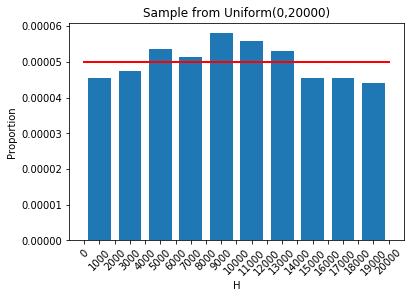

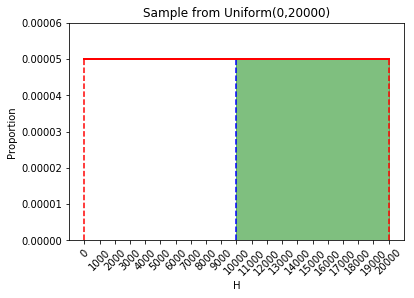

In [3]:
ub = 20000
lb = 0
p=(1/(ub-lb))

H = np.random.uniform(low=lb, high=ub, size=1000)
count, bins, ignored = plt.hist(H, 10, density=True,rwidth=0.75)
plt.plot(bins, (1/(ub-lb))*np.ones_like(bins), linewidth=2, color='r')
plt.xlabel("H")
plt.ylabel("Proportion")
plt.title("Sample from Uniform("+str(lb)+","+str(ub)+")")
plt.xticks(np.arange(0, ub+1000, step=1000.0), rotation=45)
plt.show()

hbar = 10000
x = [hbar, hbar, ub, ub]
y = [0, p, p, 0]
fig, ax = plt.subplots()
plt.plot((lb,lb),(0,p),'r--' )
plt.plot((ub,ub),(0,(1/(ub-lb))),'r--' )
plt.plot((hbar,hbar),(0,(1/(ub-lb))),'b--' )
plt.plot(bins, p*np.ones_like(bins), linewidth=2, color='r')
ax.fill(x, y,color='g', alpha=0.5)
plt.xlabel("H")
plt.ylabel("Proportion")
plt.title("Sample from Uniform("+str(lb)+","+str(ub)+")")
plt.xticks(np.arange(0, ub+1000, step=1000.0), rotation=45)
plt.axis([lb-1000,ub+1000,0,p+0.00001])
plt.show()


### Only the sickest buy insurance!
This leads to an expected loss of 
$$E(Premium) - E(Payout) = \frac{10000+20000}{2} -10000 = -5000$$ 

### Why not just raise price? 
Well, if price goes up, only the sickest (ones wanting to buy health insurance at such a high price) will be left


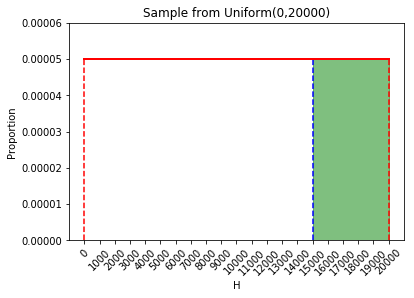

In [4]:
hbar = 15000
x = [hbar, hbar, ub, ub]
y = [0, p, p, 0]
fig, ax = plt.subplots()
plt.plot((lb,lb),(0,p),'r--' )
plt.plot((ub,ub),(0,(1/(ub-lb))),'r--' )
plt.plot((hbar,hbar),(0,(1/(ub-lb))),'b--' )
plt.plot(bins, p*np.ones_like(bins), linewidth=2, color='r')
ax.fill(x, y,color='g', alpha=0.5)
plt.xlabel("H")
plt.ylabel("Proportion")
plt.title("Sample from Uniform("+str(lb)+","+str(ub)+")")
plt.xticks(np.arange(0, ub+1000, step=1000.0), rotation=45)
plt.axis([lb-1000,ub+1000,0,p+0.00001])
plt.show()

Now the expected loss is:
$$E(Premium) - E(Payout) = \frac{15000+20000}{2} -15000 = -2500$$ 

It is better! Keep raising prices! 

In the end, the company ends up only with the sickest individuals paying the full price of health care.

This is known as a 
<center>DEATH SPIRAL OF INSURANCE</center>

# Further Questions about Lemons
1. What happens if buyers value quality of cars more highly? Example: $U_B = \sum_{j=1}^{n}2.5X_j + M$
2. Can a price ceiling help?
3. How about a minimum quality requirements?